In [ ]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
import time
from numpy.linalg import norm
import math

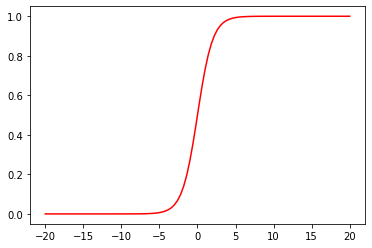

In [ ]:
#plotting Logistic function
x = np.linspace(-20,20,100)
a=sigmoid(x)

fig = plt.figure()
plt.plot(x,a, 'r')
plt.show()

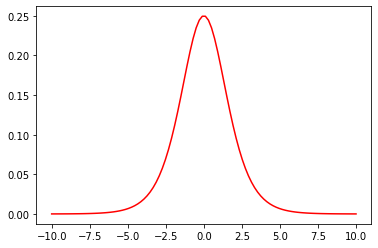

In [ ]:
#plotting derivative of logistic function
x = np.linspace(-10,10,100)
a=sigmoid(x)*(1-sigmoid(x))

fig = plt.figure()
plt.plot(x,a, 'r')
plt.show()

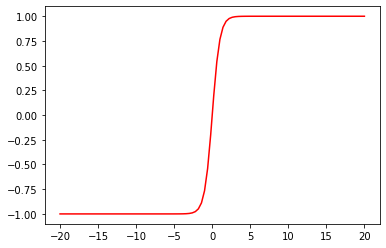

In [ ]:
#plotting tanh(x)
x = np.linspace(-20,20,100)
a=np.tanh(x)

fig = plt.figure()
plt.plot(x,a, 'r')
plt.show()

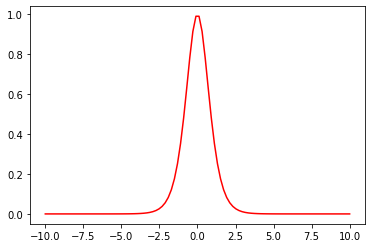

In [ ]:
#plotting derivative of tanh(x)
x = np.linspace(-10,10,100)
a=1-np.tanh(x)**2

fig = plt.figure()
plt.plot(x,a, 'r')
plt.show()

In [ ]:
def relu(G):
  return (G* (G>0))

In [ ]:
def drelu(z):
  y = (z >= 0) * 1
  return y

In [ ]:
def lrelu(G,k):
  return (G*(G>=0) + G*(G<0)*k) 


In [ ]:
def dlrelu(z,k):
  y = (z >= 0) * 1 + (z < 0)* k
  return y

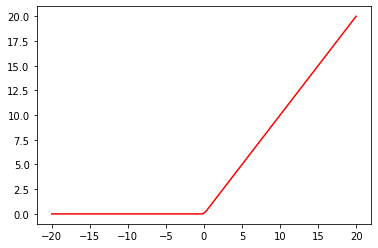

In [ ]:
#plotting ReLU(x)
x = np.linspace(-20,20,100)
a=relu(x)

fig = plt.figure()
plt.plot(x,a, 'r')
plt.show()

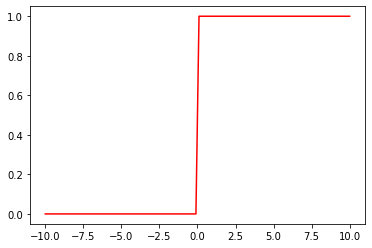

In [ ]:
#plotting derivative of ReLU(x)
x = np.linspace(-10,10,100)
a=drelu(x)

fig = plt.figure()
plt.plot(x,a, 'r')
plt.show()

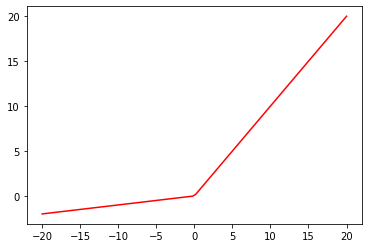

In [ ]:
#plotting LReLU(x)
x = np.linspace(-20,20,100)
a=lrelu(x,0.1)

fig = plt.figure()
plt.plot(x,a, 'r')
plt.show()

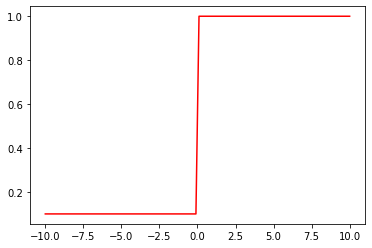

In [ ]:
#plotting derivative of LReLU(x)
x = np.linspace(-10,10,100)
a=dlrelu(x,0.1)

fig = plt.figure()
plt.plot(x,a, 'r')
plt.show()

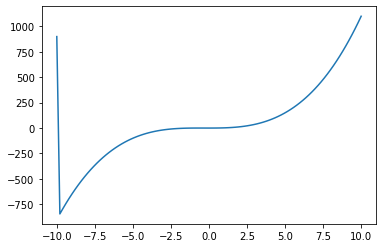

In [ ]:
X = np.linspace(-10, 10, 100)
Y=X**2 + X**3
Y[0]=Y[0]*-1
plt.plot(X,Y)
X=X.reshape(100,1)

In [ ]:
def loss_reg(y,t,N):
  return (1/(2*N))*np.sum(np.square(y-t))

In [ ]:
def forward_reg(X,U,b,W,c):    
    G = np.dot(X, U.T)  + b
    H = G* (G>0)
    y = np.dot(H,W.T) + c
    
    return y,H,G

In [ ]:
def grad_decent_reg(x,t,end):
  N=x.shape[0]
  U = np.random.randn(10,1)
  b = np.zeros(10)
  W = np.random.randn(10)
  c = 0
  num_steps =100000 
  alpha =0.001
  thresh=end
  for step in range(num_steps):
    y,H,G = forward_reg(x,U,b,W,c)
    l= loss_reg(y,t,N)
    if (l<thresh):
      print('converged at step: ',step)
      break
    if (step % 5000==0):
      print (step,' loss = ',l)

    E_bar = 1
    y_bar = (1./N) * (y - t)
    W_bar = np.dot(H.T,y_bar)
    c_bar = np.dot(y_bar, np.ones(N))
    H_bar = np.outer(y_bar, W.T )
    G_bar = H_bar * drelu(G)
    U_bar = np.dot(G_bar.T, x)
    b_bar = np.dot(G_bar.T , np.ones(N))
    
    U -= alpha * U_bar
    b -= alpha * b_bar
    W -= alpha * W_bar
    c -= alpha * c_bar
  
  return U,b,W,c

0  loss =  76800.60066490139
5000  loss =  16804.059278461773
10000  loss =  14188.702215155236
15000  loss =  13263.705948199555
20000  loss =  12931.47675529992
25000  loss =  13035.244637731317
30000  loss =  12844.052848407664
35000  loss =  12792.034055936632
40000  loss =  12790.827519905226
45000  loss =  12790.493106604577
50000  loss =  12790.285829788163
55000  loss =  12787.327625087517
60000  loss =  12771.24889711092
65000  loss =  12771.24889711092
70000  loss =  12771.24889711092
75000  loss =  12771.24889711092
80000  loss =  12771.24889711092
85000  loss =  12771.24889711092
90000  loss =  12771.24889711092
95000  loss =  12771.24889711092
7.448004722595215  seconds


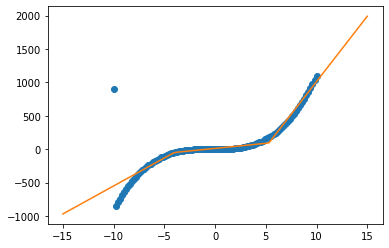

In [ ]:
start_time = time.time()
U,b,W,c=grad_decent_reg(X,Y,1)
T1=(time.time() - start_time)
print(T1,' seconds')
num_points = 100
x1s = np.linspace(-15, 15, num_points)
x1=x1s.reshape(num_points,1)

y,H,G = forward_reg(x1,U,b,W,c)
y=y.reshape(num_points)

plt.plot(X,Y,'o',x1s,y)

In [ ]:
def mini_batch_grad_decent_reg(x,t,end,bsize):
  N=x.shape[0]/bsize
  N= int (N)
  U = np.random.randn(10,1)
  b = np.zeros(10)
  W = np.random.randn(10)
  c = 0
  num_steps =100000 
  step=1
  alpha =0.0001
  thresh=end
  while (step<=num_steps):
    for i in range(N-1):
      xb=x[i*bsize:(i+1)*bsize]
      tb=t[i*bsize:(i+1)*bsize]
      y,H,G = forward_reg(xb,U,b,W,c)
      l= loss_reg(y,tb,N)
      if (l<thresh):
        break
      if (step % 5000==0):
        print (step,' loss = ',l)

      E_bar = 1
      y_bar = (1./N) * (y - tb)
      W_bar = np.dot(H.T,y_bar)
      c_bar = np.dot(y_bar, np.ones(N))
      H_bar = np.outer(y_bar, W.T )
      G_bar = H_bar * drelu(G)
      U_bar = np.dot(G_bar.T, xb)
      b_bar = np.dot(G_bar.T , np.ones(N))
      
      U -= alpha * U_bar
      b -= alpha * b_bar
      W -= alpha * W_bar
      c -= alpha * c_bar
      step += 1
    if (l<thresh):
      print('converged at step: ',step)
      break
  
  return U,b,W,c

5000  loss =  0.8876321649230378
10000  loss =  123760.11881631822
15000  loss =  12.112638257402665
20000  loss =  429.1726986061358
25000  loss =  49.56450756926161
30000  loss =  493.8426456455621
35000  loss =  48.228064834860604
40000  loss =  47.8648272218032
45000  loss =  71.61015594633879
50000  loss =  0.99686675668426
55000  loss =  123656.75415202885
60000  loss =  10.813914911369436
65000  loss =  428.54897630408897
70000  loss =  39.9946616006437
75000  loss =  466.3413876927485
80000  loss =  44.84125814725441
85000  loss =  22.970818673933188
90000  loss =  71.58676643130285
95000  loss =  1.4895017804229613
100000  loss =  123612.98955060032
6.551596403121948  seconds


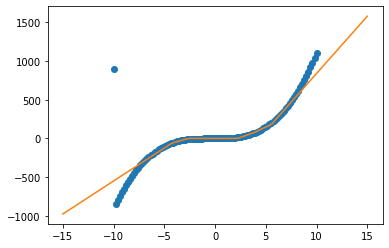

In [ ]:
X = np.linspace(-10, 10, 100)
Y=X**2 + X**3
Y[0]=Y[0]*-1
X=X.reshape(100,1)
start_time = time.time()
U,b,W,c=mini_batch_grad_decent_reg(X,Y,0.1,10)
T2=(time.time() - start_time)
print(T2,' seconds')
num_points = 100
x1s = np.linspace(-15, 15, num_points)
x1=x1s.reshape(num_points,1)

y,H,G = forward_reg(x1,U,b,W,c)
y=y.reshape(num_points)

plt.plot(X,Y,'o',x1s,y)

In [ ]:
#differnce in time of gradient descent
print(T1-T2,' seconds')

0.8964083194732666  seconds


In [ ]:
def logistic(z):
    """Logistic function."""
    return (np.divide(1,np.add(1,np.exp(np.multiply(z,-1)))))

In [ ]:
def loss(y,t,N,W,k):
  return 1/N *(np.sum(1-(y*t)) +k* norm(W)**2)

In [ ]:
def log_res(x,t,n,learning_rate,k):
  X=np.array(x)
  if (np.size(X,0) >= np.size(X,1)):
    X=np.transpose(X)
  N=X.shape[1]
  W=np.zeros((X.shape[0]))
  B=0
  for i in range(n):
    z=np.add(np.dot(W,X), B)
    y=logistic(z)
    if ((i)%100==0):
      print('iteration : ', i, ' loss : ',loss(y,t,N,W,k))
    dw= np.divide(np.dot(X,np.subtract(1,y)*y*t*-1)+2*k*W,N)
    db= np.divide(np.sum(np.subtract(1,y)*y*t*-1),N)

    W =  np.subtract(W,np.multiply(learning_rate,dw))
    B = B - learning_rate * db
  print('iteration : ', i+1, ' loss : ',loss(y,t,N,W,k))
  return (W,B)

In [ ]:
 def create_data_linear(s): 
  a=np.random.random([int (s),2])*5
  b=np.zeros(int (s))
  for i in range(int(s)):
    if (a[i,0]+a[i,1]>= 5):
      b[i]=1
    else:
      b[i]= 0
  return (a,b)

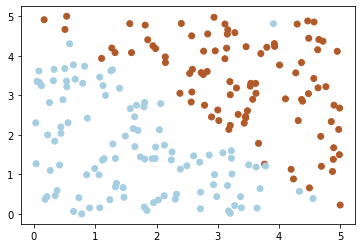

In [ ]:
#adding noise
X1,Y1= create_data_linear(200)
if(Y1[0]==0):
  Y1[0]=1
else:
  Y1[0]=0
plt.scatter(X1[:,0],X1[:,1],c=Y1,cmap=plt.cm.Paired)

In [ ]:
W,B= log_res(X1,Y1,1000,0.01,0.1)
a=np.array([[B],[W[0]],[W[1]]])
print(W)
print(B)

iteration :  0  loss :  0.7675000000000001
iteration :  100  loss :  0.5940561719582561
iteration :  200  loss :  0.5641553402566604
iteration :  300  loss :  0.5541473457509014
iteration :  400  loss :  0.549278938884496
iteration :  500  loss :  0.5464271466673087
iteration :  600  loss :  0.5445627963844824
iteration :  700  loss :  0.5432526032224064
iteration :  800  loss :  0.54228353312013
iteration :  900  loss :  0.5415389643041288
iteration :  1000  loss :  0.5409552997292512
[0.66663806 0.65519956]
0.2076074260398339


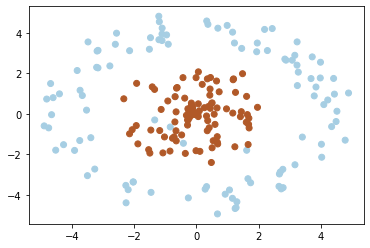

In [ ]:
np.random.seed(0)

def make_dataset(num_points):
    radius = 5
    data = []
    labels = []
    # Generate positive examples (labeled 1).
    for i in range(num_points // 2):
        r = np.random.uniform(0, radius*0.5)
        angle = np.random.uniform(0, 2*math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        data.append([x, y])
        labels.append(1)
        
    # Generate negative examples (labeled 0).
    for i in range(num_points // 2):
        r = np.random.uniform(radius*0.7, radius)
        angle = np.random.uniform(0, 2*math.pi)
        x = r * math.sin(angle)
        y = r * math.cos(angle)
        data.append([x, y])
        labels.append(0)
        
    data = np.asarray(data)
    labels = np.asarray(labels)
    return data, labels
    
num_data = 200
X, Y = make_dataset(num_data)
for i in range(5):
  if(Y[i]==0):
    Y[i]=1
  else:
    Y[i]=0


# Note: red indicates a label of 1, blue indicates a label of 0
#plt.scatter(X[:num_data//2, 0], X[:num_data//2, 1], color='red') 
#plt.scatter(X[num_data//2:, 0], X[num_data//2:, 1], color='blue')   
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Paired)

In [ ]:
def loss_stable(z,t,N):
  return (1./N) * np.sum(t*np.logaddexp(0,-z) + (1-t)*np.logaddexp(0,z))

In [ ]:
def forward(X,U,b,W,c):    
    G = np.dot(X, U.T)  + b
    H = np.tanh(G)
    z = np.dot(H,W.T) + c
    y = sigmoid(z)
    
    return y,z,H,G

In [ ]:
#visualize the prediction
def visualize_weights(d,U,b,W,c,t):
  num_points = 200
  x1s = np.linspace(-6.0, 6.0, num_points)
  x2s = np.linspace(-6.0, 6.0, num_points)

  points = np.transpose([np.tile(x1s, len(x2s)), np.repeat(x2s, len(x1s))])
  y,z,H,G = forward(points,U,b,W,c)
  y=y.reshape(num_points, num_points)
  X1, X2 = np.meshgrid(x1s, x2s)

  plt.pcolormesh(X1, X2, y, cmap=plt.cm.get_cmap('YlGn'))
  plt.colorbar()
  #plt.scatter(d[:num_data//2, 0], d[:num_data//2, 1], color='red') 
  #plt.scatter(d[num_data//2:, 0], d[num_data//2:, 1], color='blue')
  plt.scatter(d[:,0],d[:,1],c=t,cmap=plt.cm.Paired) 

In [ ]:
def grad_decent(x,t):
  N=x.shape[0]
  U = np.random.randn(3,2)
  b = np.zeros(3)
  W = np.random.randn(3)
  c = 0
  num_steps = 50000
  alpha = 1
  thresh=0.02
  for step in range(num_steps):
    y,z,H,G = forward(x,U,b,W,c)
    l= loss_stable(z,t,N)
    if (l<thresh):
      print('converged at step: ',step)
      break
    if (step % 10000==0):
      print (step,' loss = ',l)

    E_bar = 1
    z_bar = (1./N) * (y - t)
    W_bar = np.dot(H.T,z_bar)
    c_bar = np.dot(z_bar, np.ones(N))
    H_bar = np.outer(z_bar, W.T )
    G_bar = H_bar * (1 - np.tanh(G)**2)
    U_bar = np.dot(G_bar.T, x)
    b_bar = np.dot(G_bar.T , np.ones(N))
    
    U -= alpha * U_bar
    b -= alpha * b_bar
    W -= alpha * W_bar
    c -= alpha * c_bar
  
  return U,b,W,c

0  loss =  0.7057255807121043
10000  loss =  0.11473240396021021
20000  loss =  0.11402859974285164
30000  loss =  0.11345512055047347
40000  loss =  0.11282348822350668


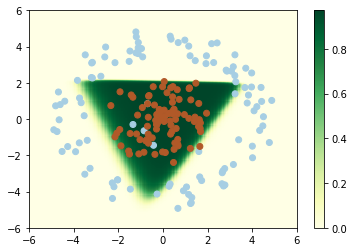

In [ ]:
#result of training
U,b,W,c=grad_decent(X,Y)
visualize_weights(X,U,b,W,c,Y)

In [ ]:
def lossreg(z,t,N,W,U,k1,k2):
  return (1./N) * (np.sum(t*np.logaddexp(0,-z) + (1-t)*np.logaddexp(0,z)) + k1*norm(U)**2 + k2*norm(W)**2)

In [ ]:
def grad_decent_reg(x,t,k1,k2):
  N=x.shape[0]
  U = np.random.randn(3,2)
  b = np.zeros(3)
  W = np.random.randn(3)
  c = 0
  num_steps = 100000
  alpha = 0.01
  thresh=0.02
  for step in range(num_steps):
    y,z,H,G = forward(x,U,b,W,c)
    l= lossreg(z,t,N,W,U,k1,k2)
    if (l<thresh):
      print('converged at step: ',step)
      break
    if (step % 10000==0):
      print (step,' loss = ',l)

    E_bar = 1
    z_bar = (1./N) * (y - t)
    W_bar = np.dot(H.T,z_bar)+2*k2*W/N
    c_bar = np.dot(z_bar, np.ones(N))
    H_bar = np.outer(z_bar, W.T )
    G_bar = H_bar * (1 - np.tanh(G)**2)
    U_bar = np.dot(G_bar.T, x)+2*k1*U/N
    b_bar = np.dot(G_bar.T , np.ones(N))
    
    U -= alpha * U_bar
    b -= alpha * b_bar
    W -= alpha * W_bar
    c -= alpha * c_bar
  
  return U,b,W,c

0  loss =  0.9111606158142683
10000  loss =  0.21564800946194712
20000  loss =  0.16399776633211097
30000  loss =  0.14766392843773082
40000  loss =  0.13964007035263556
50000  loss =  0.1352610611745304
60000  loss =  0.13249613652761907
70000  loss =  0.1306044867696676
80000  loss =  0.12923697637734693
90000  loss =  0.12820670690168914


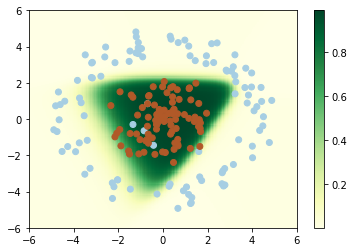

In [ ]:
U,b,W,c=grad_decent_reg(X,Y,0.1,0.01)
visualize_weights(X,U,b,W,c,Y)